In [1]:
import pandas as pd
import scipy
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df = pd.DataFrame(index=['Day 0', 'Day 1', 'Day 2'])

In [3]:
df['Staples'] = [-0.3, 4.6, 0.9]
df['RSA Security'] = [-9.5, -20.6, -17.2]
df['Nike'] = [-0.3, 0.1, 6.0]
df['Diageo'] = [1.9, 2.5, -1.0]
df['British Telecom'] = [-2.3, -1.5, 5.4]
df['HSBC'] = [-1.6, -1.2, -0.6]

In [4]:
df

,Staples,RSA Security,Nike,Diageo,British Telecom,HSBC
Day 0,-0.3,-9.5,-0.3,1.9,-2.3,-1.6
Day 1,4.6,-20.6,0.1,2.5,-1.5,-1.2
Day 2,0.9,-17.2,6.0,-1.0,5.4,-0.6


Text(0.5, 0, 'Time in days since security breach')

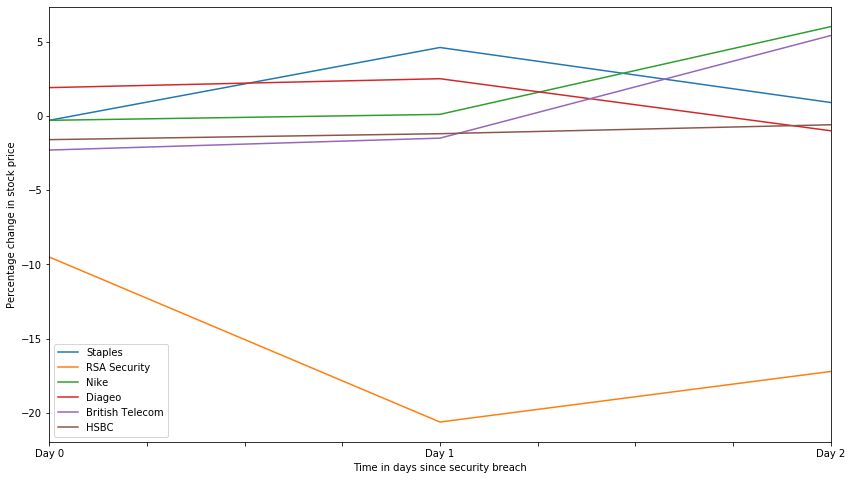

In [5]:
plot = df.plot(figsize=(14, 8))
plot.set_ylabel('Percentage change in stock price')
plot.set_xlabel('Time in days since security breach')

In [6]:
df.loc['Day 0']

Staples           -0.3
RSA Security      -9.5
Nike              -0.3
Diageo             1.9
British Telecom   -2.3
HSBC              -1.6
Name: Day 0, dtype: float64

Text(0.5, 0, 'Percentage loss')

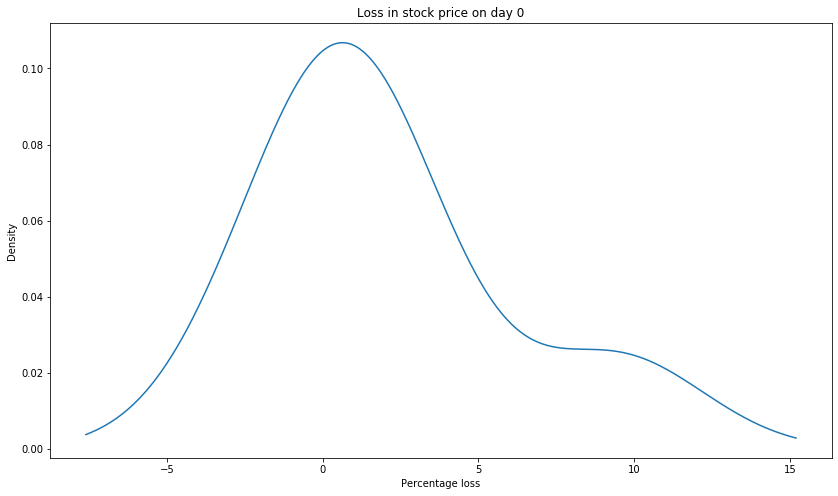

In [7]:
plot = (df.loc['Day 0']*-1).plot(kind='kde', figsize=(14,8), title='Loss in stock price on day 0')
plot.set_xlabel('Percentage loss')

In [8]:
org_val = 2e6
dist = org_val - ((100 + df.loc['Day 0']) / 100)*org_val
dist.drop('Diageo', inplace=True)

In [9]:
dist

Staples              6000.0
RSA Security       190000.0
Nike                 6000.0
British Telecom     46000.0
HSBC                32000.0
Name: Day 0, dtype: float64

Text(0.5, 0, 'Loss in euros')

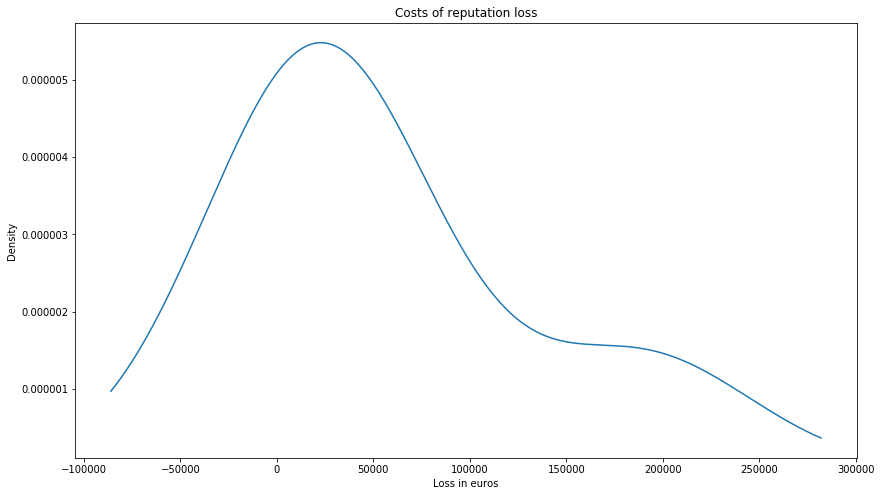

In [10]:
plot = (dist).plot(kind='kde', figsize=(14,8), title='Costs of reputation loss')
plot.set_xlabel('Loss in euros')

In [19]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(dist)

In [20]:
(fit_alpha, fit_loc, fit_beta)

(0.5949559144621941, 5999.999999999999, 43121.14404555512)

In [63]:
alpha = 0.85
loc = 6000
beta = 43000

In [64]:
samples_1 = stats.gamma.rvs(a=alpha, loc=loc, scale=beta, size=100000)

Text(0.5, 0, 'Loss in euros')

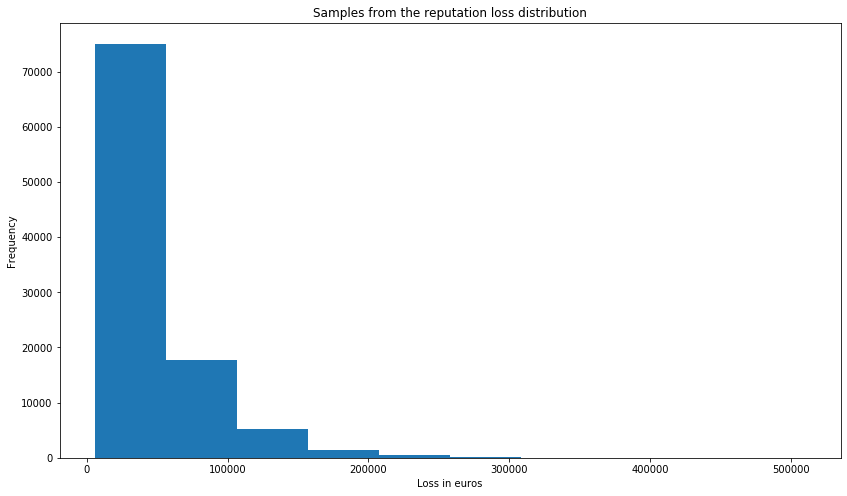

In [65]:
plot = pd.Series(samples_1).plot(kind='hist', figsize=(14, 8), title='Samples from the reputation loss distribution')
plot.set_xlabel('Loss in euros')

In [69]:
alpha2 = 0.5
loc2 = 60000
beta2 = 43000

In [70]:
samples_2 = stats.gamma.rvs(a=alpha2, loc=loc2, scale=beta2, size=100000)

Text(0.5, 0, 'Loss in euros')

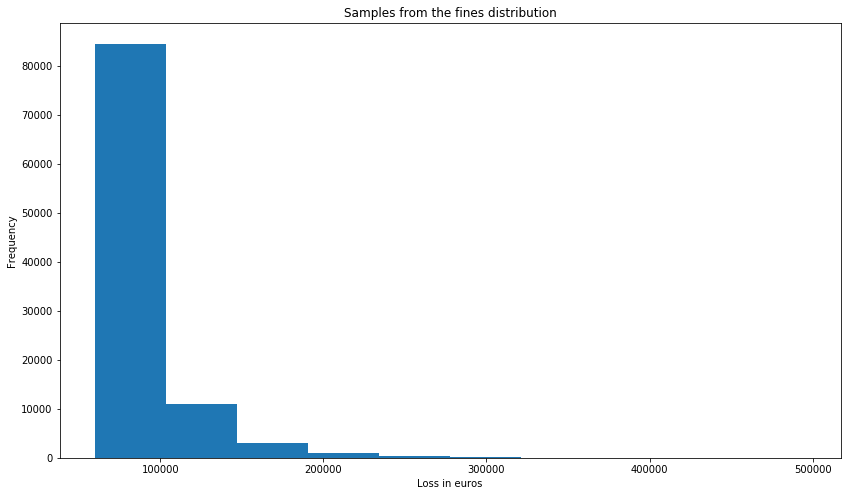

In [71]:
plot = pd.Series(samples_2).plot(kind='hist', figsize=(14, 8), title='Samples from the fines distribution')
plot.set_xlabel('Loss in euros')

<h1>Estimate the frequency distribution</h1>

In [3]:
df = pd.read_csv('data/monthly_data.csv')
# Drop the normalized columns
df = df.loc[:,[col for col in df.columns if col.find('normalized') < 0]]

In [7]:
df

,2011-9,2011-10,2011-11,2011-12,2012-1,2012-2,2012-3,2012-4,2012-5,2012-6,...,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,size
AS9329,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,18688.0
AS32613,3.0,56.0,219.0,1306.0,1505.0,1809.0,2305.0,1035.0,575.0,956.0,...,81.0,84.0,84.0,80.0,82.0,82.0,83.0,85.0,92.0,265472.0
AS7590,1.0,2.0,2.0,2.0,3.0,3.0,14.0,5.0,5.0,8.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,16384.0
AS34104,2.0,7.0,8.0,9.0,12.0,15.0,16.0,10.0,11.0,33.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17152.0
AS21844,4.0,57.0,88.0,443.0,585.0,634.0,715.0,486.0,335.0,360.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0,151808.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASNA.103.196.240.0 - 103.196.243.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1024.0
AS201168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1024.0
AS63759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1024.0
AS53727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2048.0


In [8]:
for yr in ['2012', '2013', '2014', '2015', '2016']:
    df[yr] = df[yr+'-1'] + df[yr+'-2'] + df[yr+'-3'] + df[yr+'-4'] + df[yr+'-5'] + df[yr+'-6'] + df[yr+'-7'] + df[yr+'-8'] + df[yr+'-9'] + df[yr+'-10'] + df[yr+'-11'] + df[yr+'-12']

In [12]:
pd.set_option('display.max_columns', None)
df.head()

,2011-9,2011-10,2011-11,2011-12,2012-1,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9,2012-10,2012-11,2012-12,2013-1,2013-2,2013-3,2013-4,2013-5,2013-6,2013-7,2013-8,2013-9,2013-10,2013-11,2013-12,2014-1,2014-2,2014-3,2014-4,2014-5,2014-6,2014-7,2014-8,2014-9,2014-10,2014-11,2014-12,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,2015-10,2015-11,2015-12,2016-1,2016-2,2016-3,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,size,2012,2013,2014,2015,2016
AS9329,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,4.0,3.0,6.0,6.0,5.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,18688.0,12.0,46.0,14.0,18.0,22.0
AS32613,3.0,56.0,219.0,1306.0,1505.0,1809.0,2305.0,1035.0,575.0,956.0,1020.0,707.0,691.0,627.0,577.0,878.0,720.0,994.0,1283.0,1571.0,1721.0,1637.0,1464.0,1549.0,1623.0,1352.0,1005.0,886.0,775.0,707.0,265.0,134.0,23.0,23.0,19.0,18.0,18.0,17.0,16.0,40.0,65.0,108.0,96.0,74.0,49.0,51.0,57.0,79.0,63.0,72.0,59.0,37.0,38.0,41.0,50.0,63.0,75.0,83.0,81.0,84.0,84.0,80.0,82.0,82.0,83.0,85.0,92.0,265472.0,12685.0,15805.0,2055.0,810.0,843.0
AS7590,1.0,2.0,2.0,2.0,3.0,3.0,14.0,5.0,5.0,8.0,20.0,7.0,5.0,6.0,5.0,6.0,10.0,9.0,9.0,11.0,12.0,13.0,17.0,23.0,25.0,19.0,15.0,12.0,10.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13.0,32.0,16.0,23.0,24.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,16384.0,87.0,175.0,38.0,145.0,34.0
AS34104,2.0,7.0,8.0,9.0,12.0,15.0,16.0,10.0,11.0,33.0,24.0,12.0,29.0,12.0,15.0,32.0,31.0,35.0,95.0,94.0,63.0,78.0,43.0,58.0,55.0,37.0,32.0,31.0,29.0,22.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17152.0,221.0,652.0,65.0,0.0,8.0
AS21844,4.0,57.0,88.0,443.0,585.0,634.0,715.0,486.0,335.0,360.0,310.0,294.0,432.0,270.0,254.0,316.0,286.0,280.0,341.0,341.0,304.0,337.0,243.0,200.0,182.0,137.0,80.0,45.0,35.0,33.0,13.0,6.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,3.0,48.0,17.0,14.0,12.0,13.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0,151808.0,4991.0,2776.0,112.0,134.0,108.0


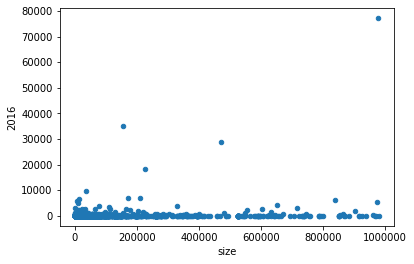

In [16]:
df.loc[df['size'] < 1e6].plot(kind='scatter', x='size', y='2016')

Text(0.5, 0, 'Amount of defacements')

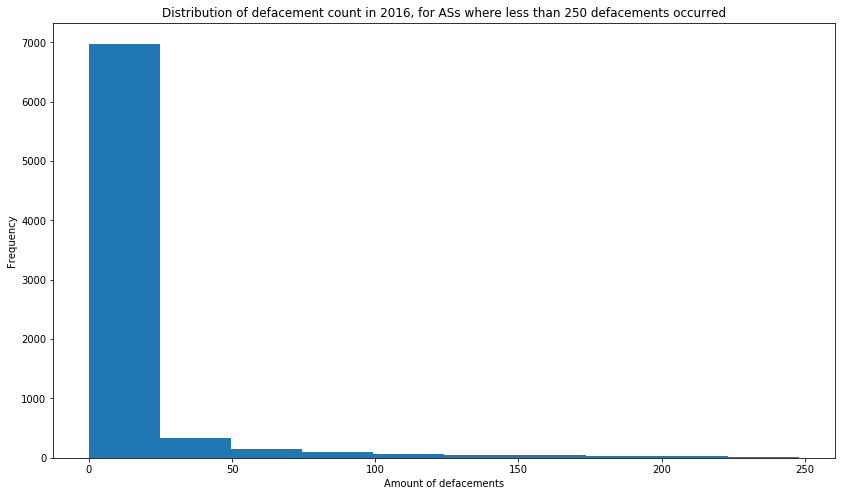

In [33]:
plot = df.loc[df['2016'] < 250, '2016'].plot(kind='hist', figsize=(14, 8), title='Distribution of defacement count in 2016, for ASs where less than 250 defacements occurred')
plot.set_xlabel('Amount of defacements')

In [29]:
df['2016'].describe()

count     8027.000000
mean        66.775632
std       1143.733704
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max      77199.000000
Name: 2016, dtype: float64

In [39]:
stats.gamma.fit(df['2016'])

(0.0022016656357651326, -3.3552505090235876e-25, 1.5620198589137149)

In [107]:
alpha=1
loc=4000
beta=10000

In [108]:
samples = stats.gamma.rvs(a=alpha, loc=loc, scale=beta, size=100000)

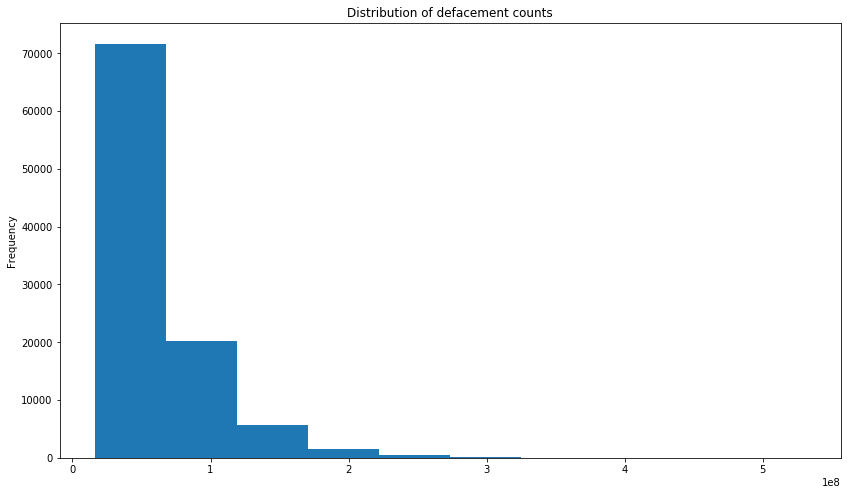

In [111]:
plot = pd.Series(samples*4096).plot(kind='hist', figsize=(14,8), title='Distribution of defacement counts')

In [110]:
df['size'].describe()

count    8.027000e+03
mean     7.761163e+05
std      5.381252e+07
min      0.000000e+00
25%      1.024000e+03
50%      4.096000e+03
75%      1.664000e+04
max      4.819180e+09
Name: size, dtype: float64